In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('dev_related', index_col = 0)
export_name = 'dev_related_with_competencies'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   School           118 non-null    object 
 1   Course           118 non-null    object 
 2   Degree_type      118 non-null    object 
 3   Pace             93 non-null     object 
 4   Mode             112 non-null    object 
 5   Country          118 non-null    object 
 6   City             118 non-null    object 
 7   Continent        118 non-null    object 
 8   Duration_years   118 non-null    float64
 9   InEnglish        118 non-null    bool   
 10  Lang_primary     118 non-null    object 
 11  Introduction     118 non-null    object 
 12  Curriculum       41 non-null     object 
 13  Careers          31 non-null     object 
 14  Program_outcome  17 non-null     object 
 15  Merged_desc      118 non-null    object 
 16  Norm_sents       118 non-null    object 
dtypes: bool(1), floa

In [5]:
df.isna().sum()/len(df)

School             0.000000
Course             0.000000
Degree_type        0.000000
Pace               0.211864
Mode               0.050847
Country            0.000000
City               0.000000
Continent          0.000000
Duration_years     0.000000
InEnglish          0.000000
Lang_primary       0.000000
Introduction       0.000000
Curriculum         0.652542
Careers            0.737288
Program_outcome    0.855932
Merged_desc        0.000000
Norm_sents         0.000000
dtype: float64

In [6]:
df.head(3)

,School,Course,Degree_type,Pace,Mode,Country,City,Continent,Duration_years,InEnglish,Lang_primary,Introduction,Curriculum,Careers,Program_outcome,Merged_desc,Norm_sents
0,Latvia University of Life Sciences and Technol...,Professional Bachelor in Information Technolog...,Bachelor,Full-time,Campus,Latvia,Jelgava,Europe,4.0,True,English,Information technologies for sustainable devel...,NaN,### Career Opportunities#### Career prospects ...,NaN,Information technologies for sustainable devel...,['information technology sustainable developme...
1,Fontys University of Applied Sciences,Bachelor in Software Engineering and Business ...,BSc,Full-time,Campus,Netherlands,Venlo,Europe,4.0,True,English,We&rsquo;re living in a &lsquo;connected world...,### Curriculum#### Content of the programmeDur...,NaN,### Program Outcome#### What to expect from us...,We're living in a world'. People are connected...,['people connect social medium device connect ...
2,Glasgow Caledonian University - The School of ...,BSc (Hons) Software Development for Business,BSc,Full-time,Campus,United Kingdom,Glasgow,Europe,4.0,True,English,Accredited by: BCS Tech Gold Tech Partnership ...,### Curriculum### What you will studyYear 1Fun...,NaN,NaN,Accredited by: BCS Tech Gold Tech Partnership ...,['accredit bcs tech gold tech partnership gcu ...


In [7]:
from ast import literal_eval
df['Norm_sents'] = df['Norm_sents'].apply(literal_eval)

In [8]:
list_of_desc = []
for i in range(0, len(df)):
    list_of_desc.append(''.join(df['Norm_sents'][i]))
    
norm_text = ''.join(list_of_desc)

# Most common - CountVectorizer

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
def get_most_common_with_stop(corpus, ngrams):
    cv = CountVectorizer(max_df=0.95, min_df=2, ngram_range=ngrams, analyzer='word')
    bow= cv.fit_transform(corpus)
    sum_words = bow.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

    return words_freq

In [11]:
def get_most_common(corpus, ngrams):
    cv = CountVectorizer(max_df=0.95, min_df=2, ngram_range=ngrams, analyzer='word',stop_words = 'english')
    bow= cv.fit_transform(corpus)
    sum_words = bow.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq

In [12]:
def plot_counts(list_of_tuples, num_of_words, title):
    counts = pd.DataFrame(list_of_tuples, 
                          columns = ["Token", 'Count'])
    p = sns.barplot(x = 'Token', y = 'Count', data = counts[:num_of_words],
                    palette = 'tab20')
    plt.xticks(rotation=55, horizontalalignment = 'right')
    p.set_xlabel('Most common tokens')
    p.set_ylabel('Number of occurences')
    plt.title(title)
    plt.show()

In [13]:
get_most_common_with_stop(df['Merged_desc'],(1,1))[:10]

[('to', 1388),
 ('software', 1013),
 ('you', 758),
 ('for', 530),
 ('engineering', 490),
 ('development', 473),
 ('with', 465),
 ('is', 431),
 ('will', 425),
 ('as', 376)]

In [14]:
get_most_common_with_stop(df['Merged_desc'],(2,3))[:10]

[('software engineering', 318),
 ('of the', 285),
 ('in the', 261),
 ('you will', 179),
 ('software development', 136),
 ('of software', 110),
 ('you ll', 105),
 ('will be', 95),
 ('such as', 88),
 ('design and', 87)]

In [15]:
get_most_common_with_stop(df['Merged_desc'],(1,3))[:15]

[('to', 1388),
 ('software', 1013),
 ('you', 758),
 ('for', 530),
 ('engineering', 490),
 ('development', 473),
 ('with', 465),
 ('is', 431),
 ('will', 425),
 ('as', 376),
 ('design', 372),
 ('your', 350),
 ('software engineering', 318),
 ('students', 316),
 ('systems', 310)]

In [16]:
unigrams = get_most_common(df['Merged_desc'],(1,1))
unigrams[:10]

[('software', 1013),
 ('engineering', 490),
 ('development', 473),
 ('design', 372),
 ('students', 316),
 ('systems', 310),
 ('computer', 306),
 ('programming', 297),
 ('skills', 283),
 ('program', 250)]

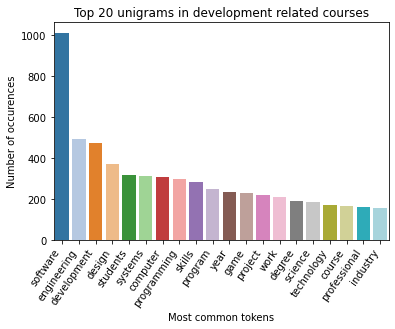

In [17]:
plot_counts(unigrams, 20, 'Top 20 unigrams in development related courses')

In [18]:
bigrams = get_most_common(df['Merged_desc'],(2,3))
bigrams[:10]

[('software engineering', 318),
 ('software development', 137),
 ('computer science', 85),
 ('software systems', 63),
 ('game development', 55),
 ('project management', 49),
 ('game design', 45),
 ('career opportunities', 41),
 ('information technology', 38),
 ('design development', 37)]

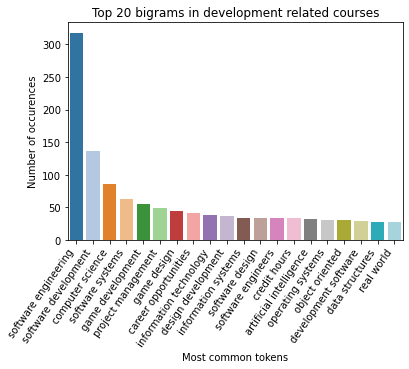

In [19]:
plot_counts(bigrams,20, 
            'Top 20 bigrams in development related courses')

In [20]:
trigrams = get_most_common(df['Merged_desc'],(3,3))
trigrams[:10]

[('science software engineering', 19),
 ('object oriented programming', 18),
 ('software engineering program', 15),
 ('career opportunities career', 14),
 ('software engineering degree', 14),
 ('data structures algorithms', 13),
 ('computer science software', 13),
 ('human computer interaction', 13),
 ('mobile application development', 12),
 ('beng hons software', 12)]

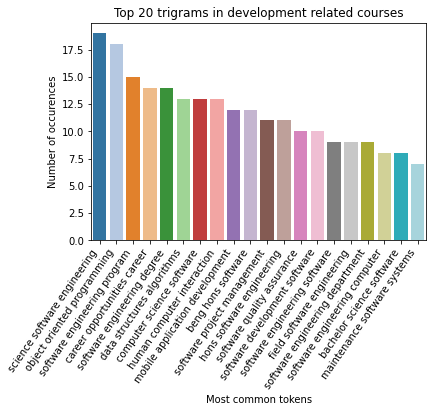

In [21]:
plot_counts(trigrams,20, 'Top 20 trigrams in development related courses')

In [22]:
ngrams = get_most_common(df['Merged_desc'],(3,4))
ngrams[:10]

[('science software engineering', 19),
 ('object oriented programming', 18),
 ('software engineering program', 15),
 ('career opportunities career', 14),
 ('software engineering degree', 14),
 ('data structures algorithms', 13),
 ('computer science software', 13),
 ('human computer interaction', 13),
 ('mobile application development', 12),
 ('beng hons software', 12)]

# TF- IDF

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
def counts_tfidf_df(corpus, ngrams):
    cv = CountVectorizer(max_df=0.95, min_df=2, ngram_range= ngrams, analyzer='word',stop_words = 'english')
    bow_counts = cv.fit_transform(corpus)
    sum_words = bow_counts.sum(axis=0) 
    df = pd.DataFrame([(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()], 
                      index = [idx for word,idx in cv.vocabulary_.items()],
                      columns = ['Phrase', 'Count'])
    
    tfidf_transformer = TfidfTransformer()
    tfidf = tfidf_transformer.fit_transform(bow_counts)
    df = df.join(pd.DataFrame(tfidf_transformer.idf_))
    
    df.columns = ['Phrase', 'Count', 'TF_IDF']
    
    return df

In [24]:
tf_idf_unigrams = counts_tfidf_df(df['Merged_desc'], (1,1))
tf_idf_unigrams.shape

(2280, 3)

In [25]:
tf_idf_unigrams.sort_values(by = 'Count', ascending = False)[:10]

,Phrase,Count,TF_IDF
1929,software,1013,1.106295
792,engineering,490,1.301787
665,development,473,1.134733
646,design,372,1.313215
2017,students,316,1.397097
2051,systems,310,1.348307
477,computer,306,1.348307
1661,programming,297,1.384674
1913,skills,283,1.348307
1656,program,250,1.461635


In [26]:
tf_idf_unigrams.sort_values(by = 'TF_IDF', ascending = False)[:10]

,Phrase,Count,TF_IDF
24,2011,2,4.680511
15,1786,2,4.680511
1319,makes,2,4.680511
1989,star,3,4.680511
720,dual,4,4.680511
1487,organises,2,4.680511
2079,telecommunications,2,4.680511
259,automatically,2,4.680511
1306,love,4,4.680511
971,fulfilled,2,4.680511


In [27]:
tf_idf_bigrams = counts_tfidf_df(df['Merged_desc'], (2,2))
tf_idf_bigrams.shape

(3035, 3)

In [28]:
tf_idf_bigrams.sort_values(by = 'Count', ascending = False)[:10]

,Phrase,Count,TF_IDF
2436,software engineering,318,1.475058
2433,software development,137,1.604736
456,computer science,85,2.090244
2463,software systems,63,2.252763
1213,game development,55,3.006535
2154,project management,49,2.168206
1209,game design,45,2.888752
330,career opportunities,41,2.141537
1424,information technology,38,2.560248
701,design development,37,2.560248


In [29]:
tf_idf_bigrams.sort_values(by = 'TF_IDF', ascending = False)[:10]

,Phrase,Count,TF_IDF
683,design advanced,2,4.680511
686,design appropriate,2,4.680511
1473,internationally leading,2,4.680511
2997,world field,2,4.680511
1136,field projects,2,4.680511
2171,projects educational,2,4.680511
926,educational subjects,2,4.680511
2642,subjects sought,2,4.680511
1624,level purpose,2,4.680511
32,ability design,7,4.680511


In [30]:
tf_idf_ngrams = counts_tfidf_df(df['Merged_desc'], (2,3))
tf_idf_ngrams.shape

(4515, 3)

In [31]:
tf_idf_ngrams.sort_values(by = 'Count', ascending = False)[:10]

,Phrase,Count,TF_IDF
3605,software engineering,318,1.475058
3582,software development,137,1.604736
693,computer science,85,2.090244
3697,software systems,63,2.252763
1798,game development,55,3.006535
3173,project management,49,2.168206
1790,game design,45,2.888752
508,career opportunities,41,2.141537
2106,information technology,38,2.560248
1054,design development,37,2.560248


In [32]:
tf_idf_ngrams.sort_values(by = 'TF_IDF', ascending = False)[:10]

,Phrase,Count,TF_IDF
3242,qualification software,2,4.680511
3460,service areas banks,2,4.680511
719,computer usage spreading,2,4.680511
4281,usage spreading rapidly,2,4.680511
3775,spreading rapidly graduates,2,4.680511
1886,graduates software engineering,3,4.680511
1463,engineering department opportunity,2,4.680511
1019,department opportunity work,2,4.680511
2772,opportunity work various,2,4.680511
2962,private institutions operating,2,4.680511


# Part of Speech tags

In [33]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [34]:
doc = nlp(' '.join([i for i in df['Merged_desc']]))

In [35]:
POS_counts = doc.count_by(spacy.attrs.POS)

for k,v in sorted(POS_counts.items(), key = lambda x: x[1], reverse=True):
    print(f'{k}. {doc.vocab[k].text:{5}}: {v}')

92. NOUN : 16252
96. PROPN: 8741
97. PUNCT: 7653
85. ADP  : 5993
100. VERB : 5612
84. ADJ  : 4346
90. DET  : 3754
89. CCONJ: 2993
95. PRON : 2318
87. AUX  : 1891
93. NUM  : 1257
94. PART : 1174
86. ADV  : 1035
98. SCONJ: 403
99. SYM  : 164
103. SPACE: 103
101. X    : 26
91. INTJ : 13


In [36]:
doc2 = nlp(norm_text)

In [37]:
POS_counts2 = doc2.count_by(spacy.attrs.POS)

for k,v in sorted(POS_counts2.items(), key = lambda x: x[1], reverse=True):
    print(f'{k}. {doc2.vocab[k].text:{5}}: {v}')

92. NOUN : 20231
84. ADJ  : 4928
100. VERB : 3946
96. PROPN: 2500
86. ADV  : 695
85. ADP  : 295
93. NUM  : 213
87. AUX  : 169
90. DET  : 61
95. PRON : 39
98. SCONJ: 37
101. X    : 35
91. INTJ : 35
89. CCONJ: 23
94. PART : 2
97. PUNCT: 2


In [38]:
verbs = []
for i in doc:
    if i.pos_ == 'VERB':
        verbs.append(str(i))

In [39]:
get_most_common(verbs, (1,1))[:10]

[('develop', 141),
 ('work', 115),
 ('learn', 90),
 ('based', 85),
 ('working', 68),
 ('including', 66),
 ('apply', 65),
 ('include', 60),
 ('gain', 58),
 ('developing', 50)]

In [40]:
nouns = []
for i in doc:
    if i.pos_ == 'NOUN':
        nouns.append(str(i))

get_most_common(nouns, (1,1))[:10]

[('software', 630),
 ('students', 303),
 ('development', 287),
 ('skills', 263),
 ('engineering', 253),
 ('design', 204),
 ('systems', 192),
 ('program', 190),
 ('programming', 178),
 ('degree', 164)]

# Patterns

In [41]:
def phrase_counter(df_column):
    counter = {}

    for i in range(0,len(df_column)):
        for phrase in df_column[i]:
            if phrase.lower() not in counter:
                counter[phrase.lower()] = 0
            counter[phrase.lower()] += 1

    return sorted(counter.items(), key=lambda item: item[1], reverse = True)

In [42]:
def extract_noun_patterns(text):
    doc = nlp(text)
    noun_pat = []
    
    # iterate over tokens
    for token in doc:
        phrase = ''
        # if the word is a subject noun or an object noun
        if (token.pos_ == 'NOUN') and (token.dep_ in ['dobj','pobj','nsubj','nsubjpass']):
            
            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective or has a compound dependency
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += subtoken.text + ' '
                    
            if len(phrase)!=0:
                phrase += token.text
             
        if  len(phrase)!=0:
            noun_pat.append(phrase)

    return noun_pat

In [43]:
df['Noun_patterns'] = df['Merged_desc'].apply(extract_noun_patterns)

In [44]:
phrase_counter(df['Noun_patterns'])[:10]

[('software engineering', 54),
 ('software development', 38),
 ('software systems', 32),
 ('computer science', 21),
 ('software engineers', 21),
 ('first year', 16),
 ('final year', 12),
 ('engineering program', 12),
 ('information technologies', 11),
 ('software design', 11)]

In [45]:
noun_pattern_counts = pd.Series([len(i) for i in df['Noun_patterns']])
noun_pattern_counts.describe()

count    118.000000
mean      32.305085
std       28.258728
min        0.000000
25%       11.000000
50%       27.500000
75%       40.750000
max      181.000000
dtype: float64

In [46]:
def extract_verb_patterns(text):
    doc = nlp(text)
    verb_pat = []

    for token in doc:
        if (token.pos_== 'VERB'):
            phrase =''
            phrase += token.lemma_
            for sub_tok in token.rights:
                if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):
                    phrase += ' '+sub_tok.text
                    verb_pat.append(phrase)

    return verb_pat

In [47]:
df['Verb_patterns'] = df['Merged_desc'].apply(extract_verb_patterns)

In [48]:
phrase_counter(df['Verb_patterns'])[:10]

[('develop skills', 31),
 ('gain experience', 20),
 ('solve problems', 17),
 ('have opportunity', 15),
 ('develop systems', 13),
 ('undertake project', 12),
 ('provide students', 11),
 ('prepare students', 11),
 ('have access', 11),
 ('continue studies', 10)]

In [49]:
verb_pattern_counts = pd.Series([len(i) for i in df['Verb_patterns']])
verb_pattern_counts.describe()

count    118.000000
mean      21.932203
std       20.517547
min        0.000000
25%        7.000000
50%       16.000000
75%       29.750000
max      116.000000
dtype: float64

In [50]:
def adj_lookup(text,index):
    
    doc = nlp(text)
    phrase = ''
    
    for token in doc:
        
        if token.i == index:
            
            for subtoken in token.children:
                if (subtoken.pos_ == 'ADJ'):
                    phrase += ' '+subtoken.text
            break
    
    return phrase

In [51]:
def extract_full_phrases(text):
    doc = nlp(text)
    sent = []
    
    for token in doc:
        # root word
        if (token.pos_=='VERB'):
            
            phrase =''
            
            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:
                
                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                    
                    # look for subject modifier
                    adj = adj_lookup(text,sub_tok.i)
                    
                    phrase += adj + ' ' + sub_tok.text

                    # save the root word of the word
                    phrase += ' '+token.lemma_ 

                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:
                        
                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):
                            
                            # look for object modifier
                            adj = adj_lookup(text,sub_tok.i)
                            
                            phrase += adj+' '+sub_tok.text
                            sent.append(phrase)
            
    return sent

In [52]:
phrases = []
for desc in df["Merged_desc"]:
    phrases.append(extract_full_phrases(desc))

In [53]:
df['Phrases'] = phrases

In [54]:
phrase_counter(df['Phrases'])[:10]

[(' you have opportunity', 8),
 (' you have access', 6),
 (' students take part', 4),
 (' you study modules', 4),
 (' graduates continue studies', 3),
 (' you take placement', 3),
 (' students follow credits', 3),
 (' you gain knowledge', 3),
 (' course offer option', 3),
 (' you study subjects', 3)]

In [55]:
phrase_counts = pd.Series([len(i) for i in df['Phrases']])
phrase_counts.describe()

count    118.000000
mean       9.220339
std        9.210859
min        0.000000
25%        3.000000
50%        6.500000
75%       12.000000
max       55.000000
dtype: float64

# Extract competencies based on keyword

In [56]:
def extract_competency(course, kw_list):
    phrases = set()
    doc = nlp(course)
    for token in doc:
        if token.text in kw_list:
            phrase = ''
            for subtoken in token.children:
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += subtoken.text + ' '
                if len(phrase)!=0:
                    phrase += token.text
                    phrases.add(phrase)
    return list(phrases)

In [57]:
def count_phrases_strip(df_column):
    counter = {}

    for i in range(0,len(df_column)):
        for skill in df_column[i]:
            adj = skill.split()[0].lower()
            if adj not in counter:
                counter[adj] = 0
            counter[adj] += 1

    return sorted(counter.items(), key=lambda item: item[1], reverse = True)

In [58]:
df['Skills'] = df['Merged_desc'].apply(extract_competency, 
                                       kw_list = ['skill','skills'])

In [59]:
phrase_counter(df['Skills'])[:10]

[('practical skills', 10),
 ('technical skills', 7),
 ('analytical skills', 7),
 ('technical skillsskills', 5),
 ('advanced skills', 4),
 ('programming skills', 4),
 ('fundamental skills', 4),
 ('practical skillsskills', 4),
 ('management skills', 4),
 ('analytical skillsskills', 4)]

In [60]:
count_phrases_strip(df['Skills'])[:10]

[('practical', 18),
 ('technical', 15),
 ('analytical', 14),
 ('advanced', 13),
 ('fundamental', 12),
 ('communication', 9),
 ('essential', 8),
 ('interpersonal', 8),
 ('design', 6),
 ('foundational', 6)]

In [61]:
df['Knowledge'] = df['Merged_desc'].apply(extract_competency, 
                                          kw_list = ['knowledge', 'fundation', 'foundations','concept', 'concepts'])
count_phrases_strip(df['Knowledge'])[:10]

[('technical', 18),
 ('core', 9),
 ('theoretical', 7),
 ('fundamental', 7),
 ('extensive', 6),
 ('adequate', 5),
 ('practical', 5),
 ('best', 4),
 ('specific', 4),
 ('modern', 4)]

In [62]:
for a,b in phrase_counter(df['Knowledge']):
    if b>1:
        print(a)

technical knowledge
technical knowledgeknowledge
core concepts
essential knowledge
theoretical knowledge
practical knowledge
key concepts
foundational knowledge
technical knowledgeknowledgeknowledge
extensive knowledgeknowledgeknowledge
extensive knowledge
extensive knowledgeknowledge
core conceptsconcepts
fundamental knowledge
theoretical foundations


In [63]:
phrase_counter(df['Merged_desc'].apply(extract_competency, 
                                      kw_list = ['ability']))[:10]

[('demonstrates ability', 1),
 ('demonstrates abilityability', 1),
 ('outstanding ability', 1),
 ('outstanding abilityinnovation ability', 1)]

In [64]:
phrase_counter(df['Merged_desc'].apply(extract_competency, 
                                      kw_list = ['competence', 'competency']))[:10]

[('technical competency', 2),
 ('technical competencycompetency', 1),
 ('english competency', 1)]

# Competencies from literature (DS spec)

In [65]:
functional_c = [
    'algorithms',
    'analyse data',
    'analytic planning',
    'analytical skills',
    'analytical thinking',
    'analytics',
    'applications engineering',
    'artificial intelligence',
    'big data analytics',
    'big data infrastructure and tools',
    'big data systems',
    'business analytics',
    'business fundamentals',
    'business model understanding',
    'business process management',
    'business strategy',
    'change management',
    'cognitive ability',
    'collect data',
    'computational thinking',
    'computer science',
    'computer skills',
    'computing',
    'conceptual foundation',
    'curation',
    'customer',
    'cybersecurity',
    'cyberethics',
    'data acquisition',
    'data ethics',
    'data governance',
    'data integrity',
    'data literacy',
    'data management',
    'data mining',
    'data privacy',
    'data security',
    'data stewardship',
    'data structures',
    'data warehousing',
    'deriving value from data',
    'design experiment',
    'digital competencies',
    'digital ethics values',
    'digital proficiency',
    'domain knowledge',
    'economics',
    'english proficiency',
    'ethical framework',
    'ethical knowledge',
    'evidence-based analytics',
    'extract business value',
    'hacking',
    'hypothesis',
    'identify patterns',
    'knowledge management',
    'literacy',
    'machine learning',
    'mathematical',
    'mathematics',
    'methodologies',
    'metrics',
    'model assessment',
    'model building',
    'modelling of digitalization risks',
    'practical implications',
    'preservation',
    'process know how',
    'programing',
    'programming',
    'qualitative methods',
    'quantitative skills',
    'relational data management',
    'research methods',
    'scientific inquiry',
    'software development',
    'software engineering',
    'software foundations',
    'software maintenance',
    'statistical',
    'statistics',
    'systematic efforts',
    'systematic reviews',
    'systems engineering',
    'technical communication',
    'technical knowledge',
    'theory building',
    'university discipline',
    'working with tools and technology',
    'writing'
]

behavioral_c = [
    'active learning',
    'adaptability',
    'collaboration',
    'communication',
    'compromising',
    'coping',
    'competence to manage team remotely',
    'coordination',
    'courage to act in new situations',
    'creating business networks',
    'creativity',
    'critical thinking',
    'curiosity',
    'decision making',
    'emotional intelligence',
    'empathy',
    'entrepreneurship',
    'ethical problem-solving',
    'ethical reasoning',
    'ethical decision making',
    'fast learning skills',
    'flexibility',
    'handling  global digitalization consequences',
    'human multilevel engagement',
    'independent decisions',
    'individual responsibility',
    'individual work',
    'information exchange',
    'innovation',
    'insightfulness',
    'inter-personal',
    'intercultural',
    'interpersonal tasks',
    'knowledge transference',
    'leadership',
    'life-long learning',
    'management',
    'mental strength',
    'negotating',
    'optimization',
    'organizing',
    'people skills',
    'planning',
    'presentation',
    'proactivity',
    'problem solving',
    'professionalism',
    'project management',
    'psychosocial competence',
    'public speaking',
    'resiliency',
    'resilince',
    'respect ethics',
    'responsibility',
    'self-management',
    'self-organisation',
    'service orientation',
    'social skills',
    'stress handling',
    'teaching',
    'teamwork',
    'work in interdisciplinary environment',
    'work-life balance',
    'working in teams'
]

holistic_c = [
    'abstraction ability',
    'academic achievements',
    'awareness for ergonomics',
    'complex exercises',
    'environmental awareness',
    'interdisciplinary skills',
    'legislation awareness',
    'managing complexity',
    'safety awareness',
    'work in interdisciplinary environment'
]

In [66]:
competencies = ['abstraction ability',
 'academic achievements',
 'active learning',
 'adaptability',
 'algorithms',
 'analyse data',
 'analytic planning',
 'analytical skills',
 'analytical thinking',
 'analytics',
 'applications engineering',
 'artificial intelligence',
 'awareness for ergonomics',
 'big data analytics',
 'big data infrastructure and tools',
 'big data systems',
 'business analytics',
 'business fundamentals',
 'business model understanding',
 'business process management',
 'business strategy',
 'change management',
 'cognitive ability',
 'collaboration',
 'collect data',
 'communication',
 'competence to manage team remotely',
 'complex exercises',
 'compromising',
 'computational thinking',
 'computer science',
 'computer skills',
 'computing',
 'conceptual foundation',
 'coordination',
 'coping',
 'courage to act in new situations',
 'creating business networks',
 'creativity',
 'critical thinking',
 'curation',
 'curiosity',
 'customercybersecurity',
 'cyberethics',
 'data acquisition',
 'data ethics',
 'data governance',
 'data integrity',
 'data literacy',
 'data management',
 'data mining',
 'data privacy',
 'data security',
 'data stewardship',
 'data structures',
 'data warehousing',
 'decision making',
 'deriving value from data',
 'design experiment',
 'digital competencies',
 'digital ethics values',
 'digital proficiency',
 'domain knowledge',
 'economics',
 'emotional intelligence',
 'empathy',
 'english proficiency',
 'entrepreneurship',
 'environmental awareness',
 'ethical framework',
 'ethical knowledge',
 'ethical problem-solving',
 'ethical reasoning',
 'ethical reasoning and decision making',
 'evidence-based analytics',
 'extract business value',
 'fast learning skills',
 'flexibility',
 'hacking',
 'handling  global digitalization consequences',
 'human multilevel engagement',
 'hypothesis',
 'identify patterns',
 'independent decisions',
 'individual responsibility',
 'individual work',
 'information exchange',
 'innovation',
 'insightfulness',
 'inter-personal',
 'intercultural competency',
 'interdisciplinary skills',
 'interpersonal tasks',
 'knowledge management',
 'knowledge transference',
 'leadership',
 'legislation awareness',
 'life-long learning',
 'literacy',
 'machine learning',
 'management',
 'managing complexity',
 'mathematical',
 'mathematics',
 'mental strength',
 'methodologies',
 'metrics',
 'model assessment',
 'model building',
 'modelling of digitalization risks',
 'negotating',
 'optimization',
 'organizing',
 'people skills',
 'planning',
 'practical implications',
 'presentation',
 'preservation',
 'proactivity',
 'problem solving',
 'process know how',
 'professionalism',
 'programing',
 'programming',
 'project management',
 'psychosocial competence',
 'public speaking',
 'qualitative methods',
 'quantitative skills',
 'relational data management',
 'research methods',
 'resiliency',
 'resilince',
 'respect ethics',
 'responsibility',
 'safety awareness',
 'scientific inquiry',
 'self-management',
 'self-organisation',
 'service orientation',
 'social skills',
 'software development',
 'software engineering',
 'software foundations',
 'software maintenance',
 'statistical',
 'statistics',
 'stress handling',
 'systematic efforts',
 'systematic reviews',
 'systems engineering',
 'teaching',
 'teamwork',
 'technical communication',
 'technical knowledge',
 'technology',
 'theory building',
 'university discipline',
 'work in interdisciplinary environment',
 'work-life balance',
 'working in teams',
 'working with tools and technology',
 'writing']

In [67]:
def competencies_from_literature(desc, competencies):
    com_from_lit = []
    for i in range(0, len(desc)):
        c = []
        for kw in competencies:
            if kw in desc[i]:
                c.append(kw)
        com_from_lit.append(c)
    return com_from_lit

In [68]:
df['Competencies_from_literature'] = competencies_from_literature(df['Merged_desc'],competencies)
df['Num_of_competencies'] = df['Competencies_from_literature'].apply(len)
df['Num_of_competencies'].mean()

5.703389830508475

In [69]:
df['Num_of_competencies'].describe()

count    118.000000
mean       5.703390
std        4.323083
min        0.000000
25%        2.250000
50%        5.000000
75%        8.000000
max       20.000000
Name: Num_of_competencies, dtype: float64

In [70]:
df['Functional_competencies'] = competencies_from_literature(df['Merged_desc'],functional_c)
df['Num_of_func_c'] = df['Functional_competencies'].apply(len)
df['Num_of_func_c'].mean()

3.1016949152542375

In [71]:
phrase_counter(df['Functional_competencies'])[:10]

[('programming', 62),
 ('software development', 54),
 ('software engineering', 49),
 ('computing', 32),
 ('computer science', 30),
 ('mathematics', 25),
 ('algorithms', 14),
 ('writing', 12),
 ('artificial intelligence', 10),
 ('data structures', 8)]

In [72]:
df['Behavioral_competencies'] = competencies_from_literature(df['Merged_desc'],behavioral_c)
df['Num_of_behav_c'] = df['Behavioral_competencies'].apply(len)
df['Num_of_behav_c'].mean()

2.2966101694915255

In [73]:
phrase_counter(df['Behavioral_competencies'])[:10]

[('management', 59),
 ('communication', 41),
 ('teaching', 32),
 ('project management', 25),
 ('presentation', 13),
 ('leadership', 12),
 ('planning', 11),
 ('teamwork', 11),
 ('creativity', 10),
 ('innovation', 9)]

In [74]:
df['Holistic_competencies'] = competencies_from_literature(df['Merged_desc'],holistic_c)
df['Num_of_hol_c'] = df['Holistic_competencies'].apply(len)
df['Num_of_hol_c'].mean()

0.00847457627118644

In [75]:
phrase_counter(df['Holistic_competencies'])[:10]

[('managing complexity', 1)]

# Token co-occurence analysis

In [76]:
def get_cooccurence_matrix(min_df, ngrams, corpus):
    
    #DTM with token counts
    cv = CountVectorizer(min_df = min_df, ngram_range = ngrams, stop_words = 'english')
    X = cv.fit_transform(corpus)
    dtm = pd.DataFrame(X.toarray())
    
    #initate cooccurence matrix with zeros
    cooc_matrix = pd.DataFrame(np.zeros((dtm.shape[1],dtm.shape[1])))
    
    end = dtm.shape[1]
    
    #increment cooc_matrix if two token appear in the same docuemnt
    for col1_i in range(0, end):
        for col2_i in range(col1_i+1,end):
            for row in range(0,len(dtm)):
                if dtm[col1_i][row] != 0 and dtm[col2_i][row] != 0:
                    cooc_matrix[col1_i][col2_i] += 1
                    cooc_matrix[col2_i][col1_i] += 1

    #labeling cooc_matrix
    cooc_matrix.columns = cv.get_feature_names()
    cooc_matrix.index = cv.get_feature_names()
    
    return cooc_matrix

In [77]:
def get_common_cooccuring(matrix, limit):
    for col in matrix.columns:
        for row in matrix.index:
            if matrix[col][row] > limit:
                print(f'{col} - {row}')

In [78]:
unigrams_cooc = get_cooccurence_matrix(min_df = 10, ngrams = (1,1), corpus = df['Merged_desc'])

In [79]:
unigrams_cooc.head()

,100,12,15,20,30,3d,abilities,ability,able,academic,...,wide,work,working,workshops,world,write,writing,written,year,years
100,0.0,2.0,4.0,3.0,3.0,1.0,1.0,1.0,3.0,6.0,...,2.0,10.0,7.0,0.0,7.0,3.0,3.0,3.0,8.0,7.0
12,2.0,0.0,1.0,3.0,3.0,2.0,1.0,2.0,3.0,5.0,...,3.0,8.0,6.0,1.0,5.0,1.0,0.0,2.0,4.0,7.0
15,4.0,1.0,0.0,3.0,3.0,0.0,0.0,2.0,2.0,2.0,...,3.0,8.0,6.0,0.0,5.0,3.0,5.0,0.0,7.0,5.0
20,3.0,3.0,3.0,0.0,3.0,1.0,1.0,2.0,4.0,2.0,...,3.0,8.0,9.0,2.0,4.0,1.0,2.0,4.0,6.0,3.0
30,3.0,3.0,3.0,3.0,0.0,1.0,0.0,5.0,3.0,3.0,...,2.0,11.0,9.0,0.0,7.0,3.0,4.0,2.0,4.0,3.0


<AxesSubplot:>

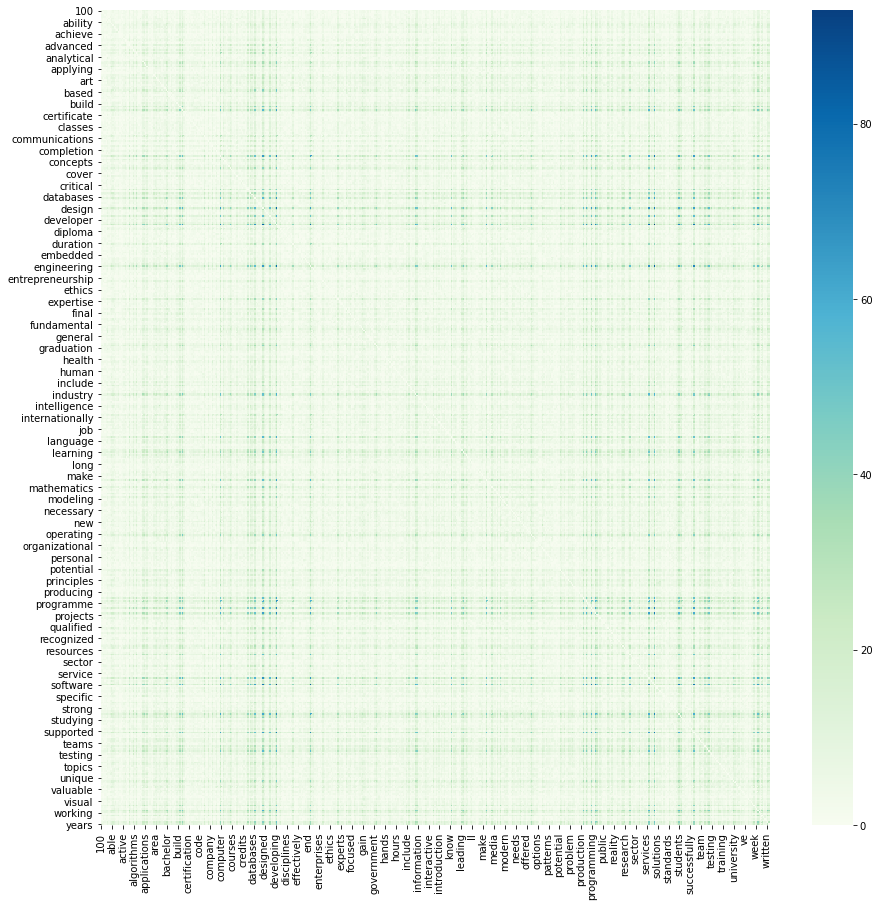

In [80]:
plt.figure(figsize = (15,15))
sns.heatmap(unigrams_cooc, cmap = 'GnBu')

In [81]:
get_common_cooccuring(unigrams_cooc, 80)

design - development
development - design
development - skills
development - software
engineering - software
skills - development
software - development
software - engineering


In [82]:
bigrams_cooc = get_cooccurence_matrix(min_df = 10, ngrams = (2,2), corpus = df['Merged_desc'])
bigrams_cooc.head()

,analysis design,application development,artificial intelligence,bachelor degree,bachelor science,big data,career opportunities,computer graphics,computer interaction,computer science,...,software systems,software testing,structures algorithms,systems software,technical skills,user experience,web design,web development,web programming,wide range
analysis design,0.0,0.0,4.0,1.0,3.0,2.0,6.0,4.0,3.0,6.0,...,9.0,3.0,2.0,2.0,1.0,0.0,3.0,2.0,4.0,3.0
application development,0.0,0.0,3.0,3.0,3.0,2.0,3.0,4.0,4.0,5.0,...,6.0,2.0,0.0,3.0,1.0,3.0,3.0,3.0,2.0,1.0
artificial intelligence,4.0,3.0,0.0,6.0,2.0,5.0,16.0,5.0,4.0,14.0,...,9.0,3.0,5.0,2.0,5.0,6.0,1.0,3.0,3.0,4.0
bachelor degree,1.0,3.0,6.0,0.0,3.0,4.0,9.0,1.0,0.0,8.0,...,10.0,2.0,2.0,3.0,3.0,3.0,2.0,2.0,0.0,1.0
bachelor science,3.0,3.0,2.0,3.0,0.0,2.0,3.0,1.0,1.0,4.0,...,4.0,4.0,2.0,1.0,3.0,0.0,1.0,1.0,0.0,1.0


In [83]:
get_common_cooccuring(bigrams_cooc, 25)

career opportunities - software development
career opportunities - software engineering
computer science - software development
computer science - software engineering
project management - software development
project management - software engineering
software development - career opportunities
software development - computer science
software development - project management
software development - software engineering
software engineering - career opportunities
software engineering - computer science
software engineering - project management
software engineering - software development
software engineering - software systems
software systems - software engineering


<AxesSubplot:>

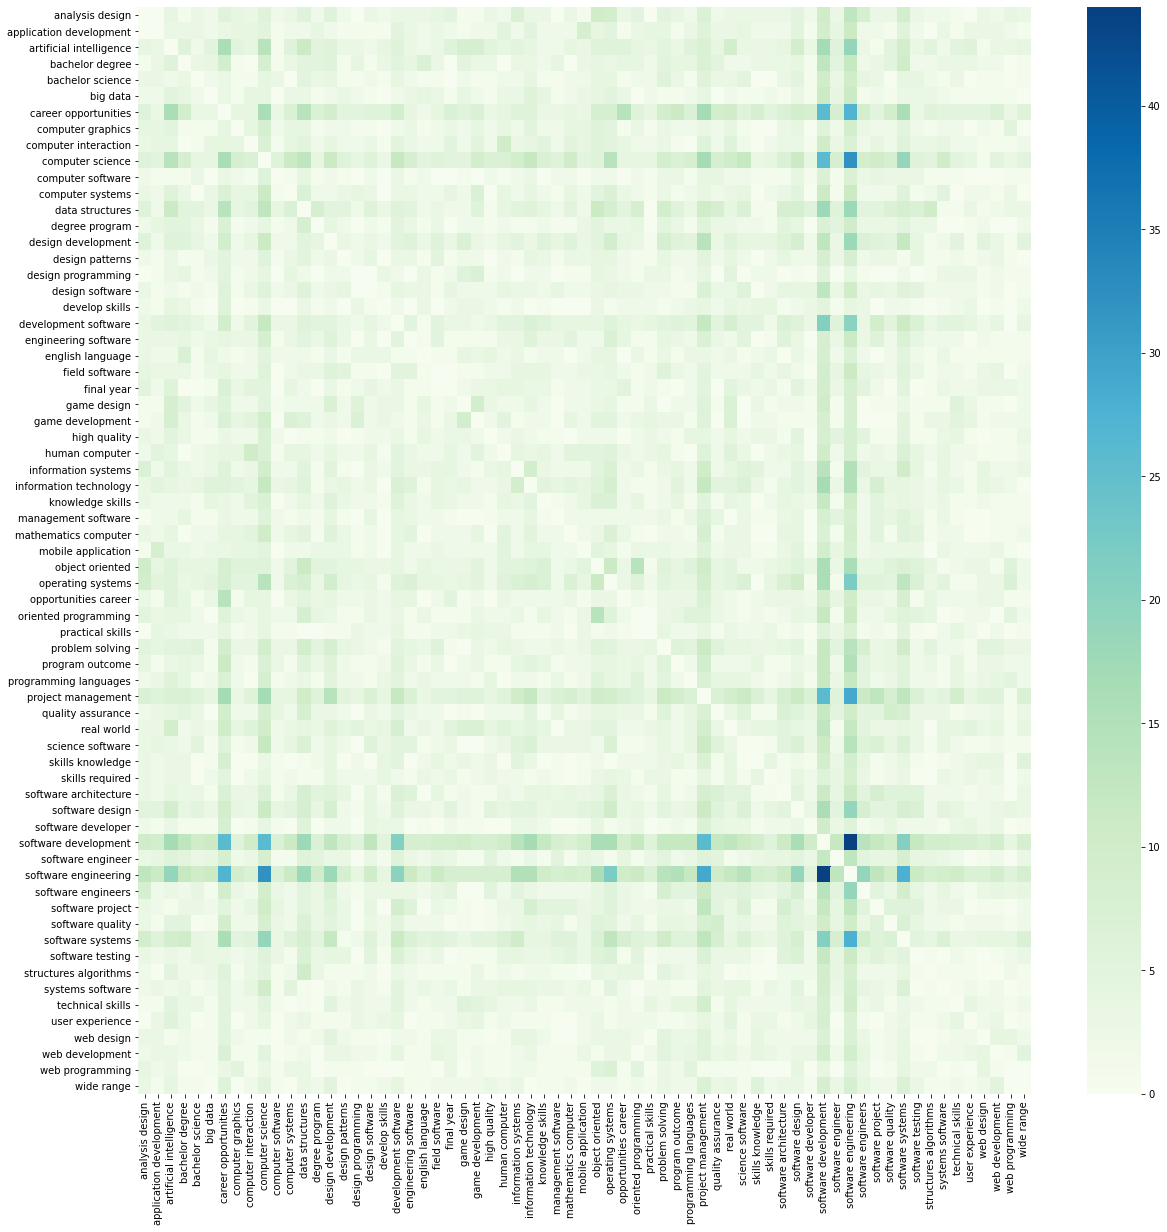

In [84]:
plt.figure(figsize = (20,20))
sns.heatmap(bigrams_cooc, cmap = 'GnBu')

In [85]:
df.to_csv(export_name)